In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
m = 1000

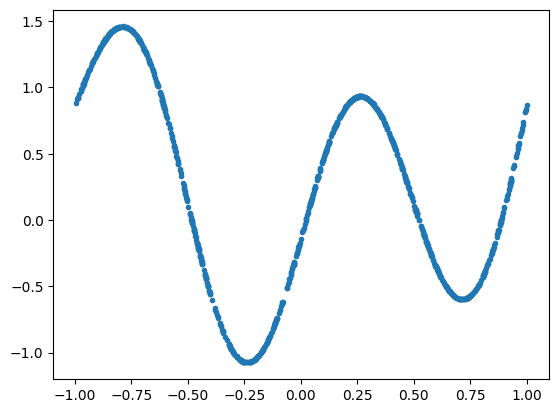

In [ ]:
X = np.random.uniform(-1,1,m)
eps = np.random.normal()
Y = X**2+np.sin(2*np.pi*X)+eps/10
plt.plot(X,Y,'.')
plt.show()

In [58]:
def kernel_1(x, x_):
    return x * x_ + 1

def kernel_2(x, x_, gamma=20):
    return np.exp(-gamma * (x - x_)**2)

def kernel_3(x, x_, gamma=5, p=10):
    return (x * x_ + gamma)**p

def gram_matrix(X, ker):
    m = len(X)
    K = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            K[i, j] = ker(X[i], X[j])
    return K

def c(X, Y, lamb, ker):
    m = len(X)
    K = gram_matrix(X, ker)
    A = lamb * m * np.eye(m) + K
    a = np.linalg.solve(A, Y)
    return a

def d(X, x_query, ker, a):
    kvec = np.array([ker(xi, x_query) for xi in X])
    return a @ kvec

a = c(X, Y, 0.01, kernel_1)
y_hat = np.array([d(X, x, kernel_1, a) for x in X])

b = c(X, Y, 0.01, kernel_2)
y_hat1 = np.array([d(X, x, kernel_2, b) for x in X])

e = c(X, Y, 0.01, kernel_3)
y_hat2 = np.array([d(X, x, kernel_3, e) for x in X])

f = c(X, Y, 10, kernel_2)
y_hat3 = np.array([d(X, x, kernel_2, f) for x in X])

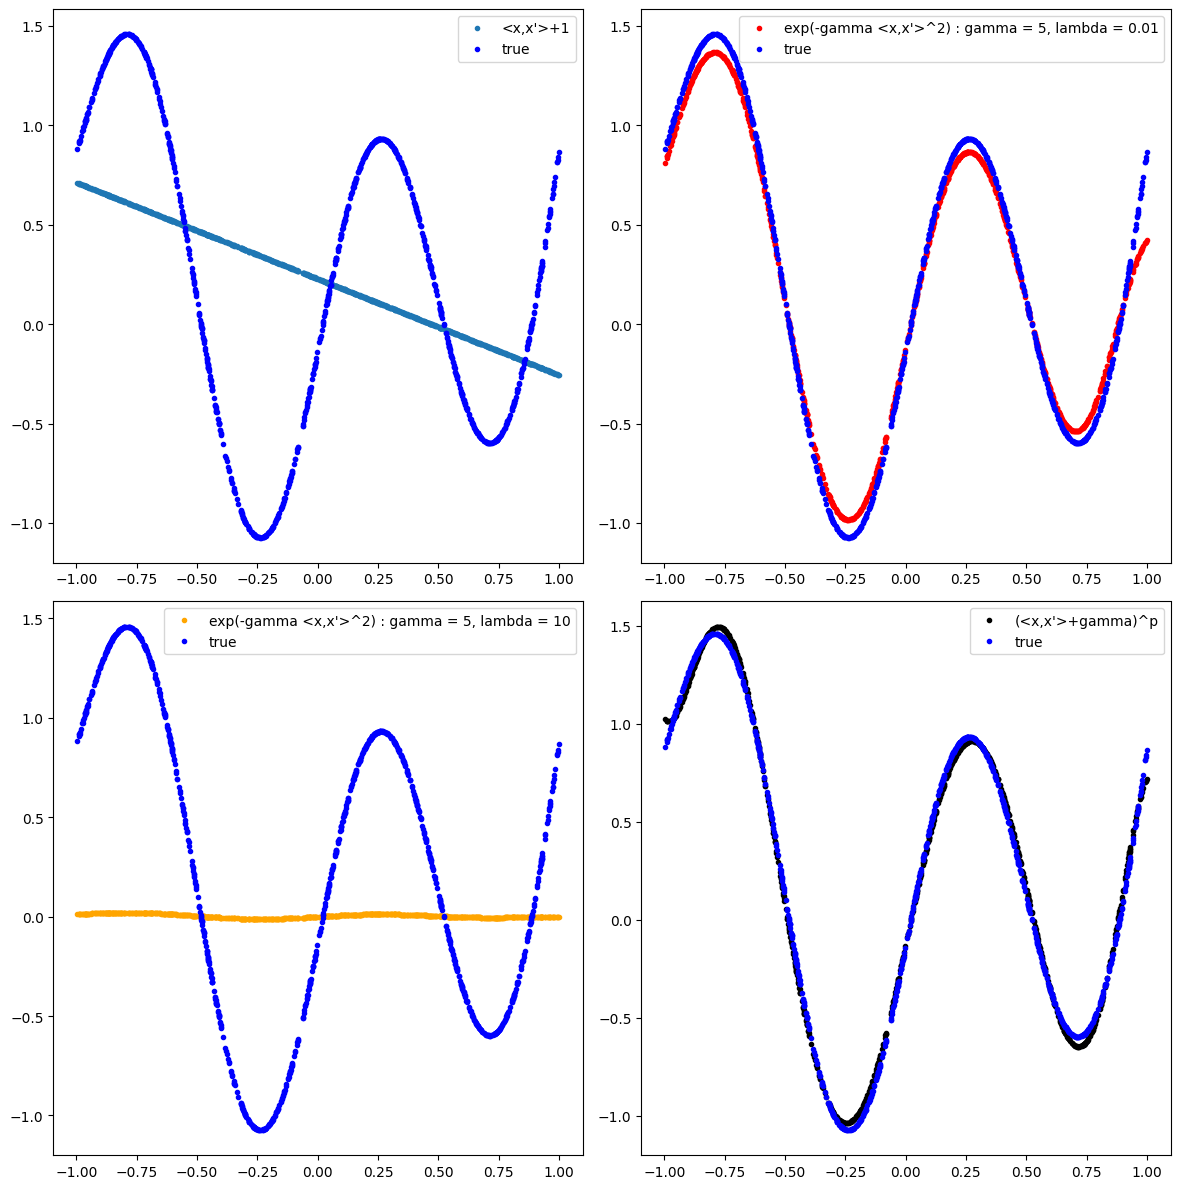

In [59]:

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

axes[0].plot(X, y_hat, '.', label="<x,x'>+1")
axes[0].legend()

axes[0].plot(X, Y, 'b.', label="true")
axes[0].legend()

axes[1].plot(X, y_hat1, 'r.', label="exp(-gamma <x,x'>^2) : gamma = 5, lambda = 0.01")
axes[1].legend()

axes[1].plot(X, Y, 'b.', label="true")
axes[1].legend()

axes[2].plot(X, y_hat3, '.',color='orange',label="exp(-gamma <x,x'>^2) : gamma = 5, lambda = 10")
axes[2].legend()

axes[2].plot(X, Y, 'b.', label="true")
axes[2].legend()

axes[3].plot(X, y_hat2, 'k.', label="(<x,x'>+gamma)^p")
axes[3].legend()

axes[3].plot(X, Y, 'b.', label="true")
axes[3].legend()



plt.tight_layout()
plt.show()